# LIMPIEZA DE DATOS COMPLETA

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importar las funciones de limpieza que ya creaste
import sys
sys.path.append('../')
from src import limpieza as sl

# Configuración de pandas para mejor visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")
print(f"📅 Fecha de ejecución: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

🧪 Pruebas de la función:
  limpiar_valor_numerico('172.587,62') = 172587.62
  limpiar_valor_numerico('555,86') = 555.86
  limpiar_valor_numerico('3.513,80') = 3513.8
  limpiar_valor_numerico('-') = nan
  limpiar_valor_numerico('') = nan
  limpiar_valor_numerico('123') = 123.0
  limpiar_valor_numerico(123.45) = 123.45
✅ Librerías importadas correctamente
📅 Fecha de ejecución: 2025-11-07 18:18


In [2]:
# Definir rutas
ruta_raw = '../data/raw/csv'
ruta_processed = '../data/processed'

# Verificar que las carpetas existen
if os.path.exists(ruta_raw) and os.path.exists(ruta_processed):
    print("✅ Rutas de datos verificadas")
else:
    print("❌ Error: Verifica las rutas de las carpetas")

✅ Rutas de datos verificadas


## Explorar el archivo CO282 (Flujos entre CCAA)

In [3]:
# Cargar el archivo CO282
archivo_co282 = 'CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Carr_entre_CCAAs_Anyo.csv'
df_co282 = pd.read_csv(os.path.join(ruta_raw, archivo_co282), 
                        encoding='utf-8', 
                        sep=',',
                        decimal=',')

print(f"📊 Dimensiones del dataset: {df_co282.shape}")
print(f"\n📋 Columnas encontradas:")
for col in df_co282.columns:
    print(f"   - {col}")

# Ver las primeras filas
df_co282.head()

📊 Dimensiones del dataset: (3600, 5)

📋 Columnas encontradas:
   - year
   - ComunidadOrigen
   - Unidad
   - ComunidadDestino
   - valor


,year,ComunidadOrigen,Unidad,ComunidadDestino,valor
0,2017,Andalucía,Miles de toneladas,Andalucía,"172.587,62"
1,2017,Andalucía,Miles de toneladas,Aragón,"555,86"
2,2017,Andalucía,Miles de toneladas,"Asturias, Principado de","133,82"
3,2017,Andalucía,Miles de toneladas,Cantabria,"102,57"
4,2017,Andalucía,Miles de toneladas,Castilla - La Mancha,"3.513,80"


In [4]:
# Analizar años disponibles
print("📅 Años disponibles:")
print(sorted(df_co282['year'].unique()))

# Analizar unidades
print("\n📏 Unidades encontradas:")
print(df_co282['Unidad'].unique())

# Ver cuántas combinaciones origen-destino hay por año
combinaciones_por_año = df_co282.groupby('year').size()
print(f"\n📊 Registros por año:")
print(combinaciones_por_año)

# Verificar si hay valores nulos o problemáticos
print(f"\n❓ Valores nulos por columna:")
print(df_co282.isnull().sum())

# Ver algunos ejemplos de valores
print("\n🔍 Muestra de valores en la columna 'valor':")
print(df_co282['valor'].head(10))

📅 Años disponibles:
[np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]

📏 Unidades encontradas:
['Miles de toneladas' 'Millones de toneladas-kilómetro']

📊 Registros por año:
year
2017    450
2018    450
2019    450
2020    450
2021    450
2022    450
2023    450
2024    450
dtype: int64

❓ Valores nulos por columna:
year                 0
ComunidadOrigen      0
Unidad               0
ComunidadDestino     0
valor               10
dtype: int64

🔍 Muestra de valores en la columna 'valor':
0    172.587,62
1        555,86
2        133,82
3        102,57
4      3.513,80
5      1.240,55
6      2.378,83
7      4.619,26
8      3.797,74
9        334,38
Name: valor, dtype: object


In [5]:
# Crear una copia para trabajar
df_co282_limpio = df_co282.copy()

# 1. Limpiar la columna valor usando tu función
df_co282_limpio['valor'] = df_co282_limpio['valor'].apply(sl.limpiar_valor_numerico)

# 2. Verificar los valores nulos
print("🔍 Análisis de valores nulos:")
nulos = df_co282_limpio[df_co282_limpio['valor'].isnull()]
print(f"- Total de valores nulos: {len(nulos)}")
if len(nulos) > 0:
    print("\nEjemplos de registros con valores nulos:")
    print(nulos[['ComunidadOrigen', 'ComunidadDestino', 'year', 'Unidad']].head())

# 3. Estadísticas por unidad
print("\n📊 Estadísticas por tipo de unidad:")
for unidad in df_co282_limpio['Unidad'].unique():
    datos_unidad = df_co282_limpio[df_co282_limpio['Unidad'] == unidad]['valor']
    print(f"\n{unidad}:")
    print(f"  - Registros: {len(datos_unidad)}")
    print(f"  - Valores no nulos: {datos_unidad.notna().sum()}")
    print(f"  - Media: {datos_unidad.mean():.2f}")
    print(f"  - Mediana: {datos_unidad.median():.2f}")
    print(f"  - Máximo: {datos_unidad.max():.2f}")

🔍 Análisis de valores nulos:
- Total de valores nulos: 10

Ejemplos de registros con valores nulos:
     ComunidadOrigen ComunidadDestino  year                           Unidad
704      Extremadura        Rioja, La  2018               Miles de toneladas
719      Extremadura        Rioja, La  2018  Millones de toneladas-kilómetro
878        Rioja, La      Extremadura  2018               Miles de toneladas
893        Rioja, La      Extremadura  2018  Millones de toneladas-kilómetro
1593     Extremadura        Cantabria  2020               Miles de toneladas

📊 Estadísticas por tipo de unidad:

Miles de toneladas:
  - Registros: 1800
  - Valores no nulos: 1795
  - Media: 6187.13
  - Mediana: 889.53
  - Máximo: 204473.18

Millones de toneladas-kilómetro:
  - Registros: 1800
  - Valores no nulos: 1795
  - Media: 750.33
  - Mediana: 347.82
  - Máximo: 12855.27


In [6]:
# Separar por tipo de unidad
df_co282_toneladas = df_co282_limpio[
    df_co282_limpio['Unidad'] == 'Miles de toneladas'
].copy()

df_co282_ton_km = df_co282_limpio[
    df_co282_limpio['Unidad'] == 'Millones de toneladas-kilómetro'
].copy()

# Limpiar nombres de columnas
df_co282_toneladas.columns = ['año', 'comunidad_origen', 'unidad', 'comunidad_destino', 'valor']
df_co282_ton_km.columns = ['año', 'comunidad_origen', 'unidad', 'comunidad_destino', 'valor']

# Eliminar la columna unidad ya que ahora es redundante
df_co282_toneladas = df_co282_toneladas.drop('unidad', axis=1)
df_co282_ton_km = df_co282_ton_km.drop('unidad', axis=1)

print("📊 Datasets separados:")
print(f"- Toneladas: {df_co282_toneladas.shape}")
print(f"- Toneladas-km: {df_co282_ton_km.shape}")

# Ver matriz origen-destino de ejemplo (año 2024, primeras 5 CCAA)
print("\n🗺️ Ejemplo de matriz O-D (2024, toneladas, primeras 5 filas):")
ejemplo_2024 = df_co282_toneladas[df_co282_toneladas['año'] == 2024].head()
print(ejemplo_2024)

📊 Datasets separados:
- Toneladas: (1800, 4)
- Toneladas-km: (1800, 4)

🗺️ Ejemplo de matriz O-D (2024, toneladas, primeras 5 filas):
       año comunidad_origen        comunidad_destino     valor
3150  2024        Andalucía                Andalucía 198630.67
3151  2024        Andalucía                   Aragón    852.91
3152  2024        Andalucía  Asturias, Principado de    128.45
3153  2024        Andalucía                Cantabria     54.51
3154  2024        Andalucía     Castilla - La Mancha   3855.94


In [7]:
# Guardar los archivos limpios
archivo_ton = os.path.join(ruta_processed, 'CO282_flujos_ccaa_toneladas_clean.csv')
archivo_km = os.path.join(ruta_processed, 'CO282_flujos_ccaa_ton_km_clean.csv')

# Guardar con formato estándar
df_co282_toneladas.to_csv(archivo_ton, index=False, encoding='utf-8')
df_co282_ton_km.to_csv(archivo_km, index=False, encoding='utf-8')

print("✅ Archivos guardados:")
print(f"   - {archivo_ton}")
print(f"   - {archivo_km}")

# Resumen del proceso
print("\n📊 RESUMEN DE LIMPIEZA - CO282:")
print(f"- Registros originales: 3,600")
print(f"- Registros con valores nulos: 10")
print(f"- Registros limpios totales: 3,590")
print(f"- Dataset toneladas: 1,800 registros")
print(f"- Dataset ton-km: 1,800 registros")
print(f"- Años disponibles: 2017-2024")
print(f"- Pares origen-destino únicos: 225")

✅ Archivos guardados:
   - ../data/processed\CO282_flujos_ccaa_toneladas_clean.csv
   - ../data/processed\CO282_flujos_ccaa_ton_km_clean.csv

📊 RESUMEN DE LIMPIEZA - CO282:
- Registros originales: 3,600
- Registros con valores nulos: 10
- Registros limpios totales: 3,590
- Dataset toneladas: 1,800 registros
- Dataset ton-km: 1,800 registros
- Años disponibles: 2017-2024
- Pares origen-destino únicos: 225


## Explorar el archivo CO285 (Operaciones en Vacío)

In [8]:
print("\n" + "="*60)
print("📂 ARCHIVO 2: CO285 - OPERACIONES EN VACÍO")
print("="*60)


# Ruta a la carpeta de datos
ruta_datos = os.path.join('..', 'data', 'raw', 'csv')

# Listar todos los archivos CSV disponibles
archivos_csv = [f for f in os.listdir(ruta_datos) if f.endswith('.csv')]
print(f"📁 Se encontraron {len(archivos_csv)} archivos CSV:")
for archivo in archivos_csv:
    print(f"   - {archivo}")

# Cargar el archivo
for archivo in archivos_csv:
    path = os.path.join(ruta_datos, archivo)
    df = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

path = os.path.join(ruta_datos, "CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_TipoDesplaz_Anyo.csv")
df_co285 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

print(f"\n📊 Dimensiones del dataset: {df_co285.shape}")
print(f"\n📋 Columnas encontradas:")
for col in df_co285.columns:
    print(f"   - {col}")

# Ver las primeras filas
print("\n🔍 Primeras 5 filas:")
df_co285.head(5)


📂 ARCHIVO 2: CO285 - OPERACIONES EN VACÍO
📁 Se encontraron 8 archivos CSV:
   - CO280_Trafico_Total_Merc_Veh_Espanyoles_Carr__CCAA_TipoMercancia_TipoDesplaz_Anyo.csv
   - CO282_CO281_Flujos_Nac_Merc_Veh_Espanyoles_Carr_entre_CCAAs_Anyo.csv
   - CO285_OperVacio_Veh_Espanyoles_Carr__CCAA_TipoDesplaz_Anyo.csv
   - CO497_indice_precios_TRM_Carr__tramosDistancias.csv
   - CO516_Superficie_Instalacs_Logistica_Carr__TipoInstalac_CCAA_Provincia.csv
   - CO519_Trafico_Total_Merc__ModoTransporte_TipoTrafico_Anyo.csv
   - CO597_CO598_TRM_int_CAR_Tn_TnKm_Merc_RecibExped_ESP__paises_OrigenDestino.csv
   - CO614_Coste_TRM_Carr__tipo_veh.csv

📊 Dimensiones del dataset: (1728, 13)

📋 Columnas encontradas:
   - comunidad
   - Estado_Operacion
   - year
   - Tipo_transporte2
   - tipo_desplazamiento
   - valor2
   - Textbox12
   - Textbox13
   - Textbox21
   - Textbox23
   - Textbox7
   - Textbox9
   - Textbox10

🔍 Primeras 5 filas:


,comunidad,Estado_Operacion,year,Tipo_transporte2,tipo_desplazamiento,valor2,Textbox12,Textbox13,Textbox21,Textbox23,Textbox7,Textbox9,Textbox10
0,Andalucía,Número de operaciones en vacío,2017,Transporte intrarregional,Intramunicipal,3.816.169,Total Transporte intrarregional,11.593.133,Total 2017,12.742.156,"46,95%","46,67%","42,18%"
1,Andalucía,Número de operaciones en vacío,2017,Transporte intrarregional,Intermunicipal intrarregional,7.776.964,Total Transporte intrarregional,11.593.133,Total 2017,12.742.156,"46,53%","46,67%","42,18%"
2,Andalucía,Número de operaciones en vacío,2017,Transporte interregional,Expedido,637.989,Total Transporte interregional,1.074.590,Total 2017,12.742.156,"27,90%","22,29%","42,18%"
3,Andalucía,Número de operaciones en vacío,2017,Transporte interregional,Recibido,436.601,Total Transporte interregional,1.074.590,Total 2017,12.742.156,"17,22%","22,29%","42,18%"
4,Andalucía,Número de operaciones en vacío,2017,Transporte internacional,Expedido (exportaciones),16.685,Total Transporte internacional,74.433,Total 2017,12.742.156,"4,67%","13,64%","42,18%"


In [9]:
# Crear copia para limpieza
df_co285_limpio = df_co285.copy()

# 1. Limpiar la columna valor2
df_co285_limpio['valor2'] = df_co285_limpio['valor2'].apply(sl.limpiar_valor_numerico)

# 2. Limpiar las columnas de totales numéricas
columnas_numericas = ['Textbox13', 'Textbox23']
for col in columnas_numericas:
    df_co285_limpio[col] = df_co285_limpio[col].apply(sl.limpiar_valor_numerico)

# 3. Limpiar columnas de porcentajes (eliminar % y convertir)
def limpiar_porcentaje(valor):
    """Convierte valores de porcentaje a float"""
    if isinstance(valor, str):
        # Eliminar el símbolo % y convertir
        valor = valor.replace('%', '').replace(',', '.')
        try:
            return float(valor)
        except:
            return np.nan
    return valor

columnas_porcentajes = ['Textbox7', 'Textbox9', 'Textbox10']
for col in columnas_porcentajes:
    df_co285_limpio[col] = df_co285_limpio[col].apply(limpiar_porcentaje)

# 4. Renombrar columnas para mayor claridad
df_co285_limpio = df_co285_limpio.rename(columns={
    'valor2': 'operaciones_vacio',
    'Textbox7': 'porcentaje_sobre_tipo',
    'Textbox9': 'porcentaje_sobre_total_tipo',
    'Textbox10': 'porcentaje_sobre_total_anual',
    'Textbox12': 'categoria_total',
    'Textbox13': 'total_operaciones_tipo'
})

# 5. Seleccionar solo las columnas relevantes
columnas_finales = [
    'comunidad', 'year', 'Tipo_transporte2', 'tipo_desplazamiento',
    'operaciones_vacio', 'porcentaje_sobre_tipo'
]

df_co285_final = df_co285_limpio[columnas_finales].copy()

# Ver resumen
print("✅ Dataset CO285 limpio:")
print(f"Dimensiones: {df_co285_final.shape}")
print(f"\n📊 Primeras filas del dataset limpio:")
df_co285_final.head(10)

✅ Dataset CO285 limpio:
Dimensiones: (1728, 6)

📊 Primeras filas del dataset limpio:


,comunidad,year,Tipo_transporte2,tipo_desplazamiento,operaciones_vacio,porcentaje_sobre_tipo
0,Andalucía,2017,Transporte intrarregional,Intramunicipal,3816169.00,46.95
1,Andalucía,2017,Transporte intrarregional,Intermunicipal intrarregional,7776964.00,46.53
2,Andalucía,2017,Transporte interregional,Expedido,637989.00,27.90
3,Andalucía,2017,Transporte interregional,Recibido,436601.00,17.22
4,Andalucía,2017,Transporte internacional,Expedido (exportaciones),16685.00,4.67
5,Andalucía,2017,Transporte internacional,Recibido (importaciones),57748.00,30.62
6,Andalucía,2018,Transporte intrarregional,Intramunicipal,3544652.00,46.32
7,Andalucía,2018,Transporte intrarregional,Intermunicipal intrarregional,8091333.00,45.93
8,Andalucía,2018,Transporte interregional,Expedido,637598.00,28.46
9,Andalucía,2018,Transporte interregional,Recibido,372660.00,14.38


In [10]:
# Renombrar columnas para consistencia
df_co285_final = df_co285_final.rename(columns={
    'year': 'año',
    'Tipo_transporte2': 'tipo_transporte',
    'porcentaje_sobre_tipo': 'porcentaje_vacio'
})

print("✅ Dataset CO285 refinado:")
print(f"Dimensiones: {df_co285_final.shape}")
print(f"\n📊 Resumen del dataset:")
print(df_co285_final.info())

# Verificar algunos estadísticos
print(f"\n📈 Estadísticas de operaciones en vacío:")
print(f"- Media: {df_co285_final['operaciones_vacio'].mean():,.0f} operaciones")
print(f"- Mediana: {df_co285_final['operaciones_vacio'].median():,.0f} operaciones")
print(f"- Máximo: {df_co285_final['operaciones_vacio'].max():,.0f} operaciones")

print(f"\n📊 Porcentaje promedio de vacío por tipo de transporte:")
porcentaje_por_tipo = df_co285_final.groupby('tipo_transporte')['porcentaje_vacio'].mean()
for tipo, pct in porcentaje_por_tipo.items():
    print(f"- {tipo}: {pct:.1f}%")

✅ Dataset CO285 refinado:
Dimensiones: (1728, 6)

📊 Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   comunidad            1728 non-null   object 
 1   año                  1728 non-null   int64  
 2   tipo_transporte      1728 non-null   object 
 3   tipo_desplazamiento  1728 non-null   object 
 4   operaciones_vacio    1630 non-null   float64
 5   porcentaje_vacio     1630 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 81.1+ KB
None

📈 Estadísticas de operaciones en vacío:
- Media: 1,702,041 operaciones
- Mediana: 653,034 operaciones
- Máximo: 26,632,305 operaciones

📊 Porcentaje promedio de vacío por tipo de transporte:
- Transporte internacional: 15.6%
- Transporte interregional: 30.2%
- Transporte intrarregional: 47.1%


In [11]:
# Guardar el archivo limpio
archivo_co285_clean = os.path.join(ruta_processed, 'CO285_operaciones_vacio_clean.csv')
df_co285_final.to_csv(archivo_co285_clean, index=False, encoding='utf-8')

print(f"✅ Archivo guardado: {archivo_co285_clean}")

# Resumen del proceso
print("\n📊 RESUMEN DE LIMPIEZA - CO285:")
print(f"- Registros originales: 1,728")
print(f"- Registros limpios: {len(df_co285_final)}")
print(f"- Años disponibles: {sorted(df_co285_final['año'].unique())}")
print(f"- Tipos de transporte: {df_co285_final['tipo_transporte'].nunique()}")
print(f"- Información clave: Operaciones en vacío y % sobre el total")

✅ Archivo guardado: ../data/processed\CO285_operaciones_vacio_clean.csv

📊 RESUMEN DE LIMPIEZA - CO285:
- Registros originales: 1,728
- Registros limpios: 1728
- Años disponibles: [np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
- Tipos de transporte: 3
- Información clave: Operaciones en vacío y % sobre el total


## Explorar el archivo CO497 (índice de precios por tramo de distancia)

In [12]:
fname = "CO497_indice_precios_TRM_Carr__tramosDistancias.csv"
path = os.path.join(ruta_raw, fname)
df497 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

df497.shape, df497.columns

((96, 4),
 Index(['year', 'nombreOPTMC_tram_dist', 'nombreOTRVC_concepto', 'valor'], dtype='object'))

In [13]:
df = df497.copy()

# Renombrar columnas
df.columns = ['year', 'tramo_distancia', 'concepto_precio', 'indice']

# Normalizar texto
for c in ['tramo_distancia', 'concepto_precio']:
    df[c] = df[c].astype(str).str.strip().str.lower()

# Conversión robusta de 'indice' a numérico
df['indice'] = (
    df['indice']
    .astype(str)
    .str.replace('%', '', regex=False)       # quita el símbolo de porcentaje
    .str.replace(',', '.', regex=False)      # convierte coma decimal a punto
    .str.replace('−', '-', regex=False)      # reemplaza guiones especiales
    .str.replace(' ', '', regex=False)       # elimina espacios
)

# Reemplaza valores vacíos o erróneos
df['indice'] = pd.to_numeric(df['indice'], errors='coerce')

df['indice'].head(10)

# Eliminar filas nulas o sin año
df = df.dropna(subset=['indice', 'year'])
df['year'] = df['year'].astype(int)

df.head()


,year,tramo_distancia,concepto_precio,indice
0,2017,50 km y menos,precio medio del año (índice),132.10
1,2017,50 km y menos,variación sobre el año anterior,-0.70
2,2017,entre 51 y 100 km,precio medio del año (índice),130.00
3,2017,entre 51 y 100 km,variación sobre el año anterior,-1.30
4,2017,entre 101 y 200 km,precio medio del año (índice),125.30


In [14]:
df['indice'].dtype

dtype('float64')

In [15]:
df[df['indice'].isna()].head(10)

,year,tramo_distancia,concepto_precio,indice


In [16]:
df['tramo_distancia'].unique()

array(['50 km y menos', 'entre 51 y 100 km', 'entre 101 y 200 km',
       'entre 201 y 300 km', 'más de 300 km', 'todas'], dtype=object)

In [17]:
# Simplificar etiquetas
df['tramo_distancia'] = df['tramo_distancia'].str.replace('km','', regex=False)
df['tramo_distancia'] = df['tramo_distancia'].str.replace('hasta','0-', regex=False)
df['tramo_distancia'] = df['tramo_distancia'].str.replace('más de','> ', regex=False)
df['tramo_distancia'] = df['tramo_distancia'].str.replace('mas de','> ', regex=False)
df['tramo_distancia'] = df['tramo_distancia'].str.strip()

df['tramo_distancia'].unique()

array(['50  y menos', 'entre 51 y 100', 'entre 101 y 200',
       'entre 201 y 300', '>  300', 'todas'], dtype=object)

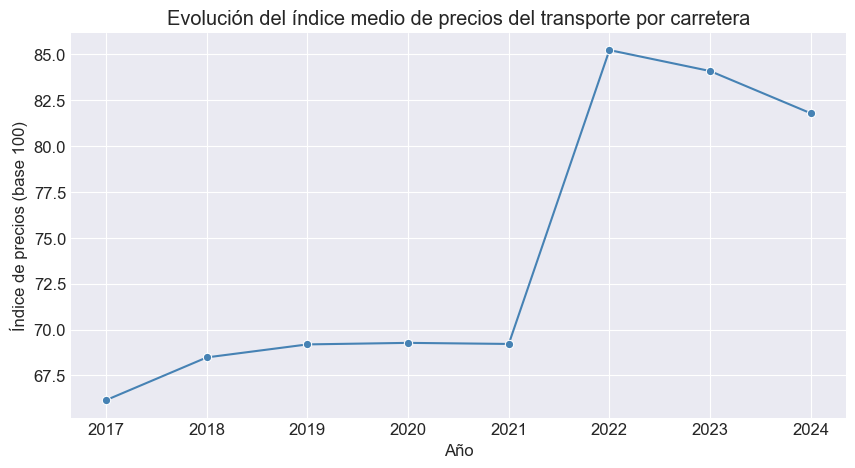

In [18]:
evolucion = df.groupby('year', as_index=False)['indice'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(data=evolucion, x='year', y='indice', marker='o', color='steelblue')
plt.title('Evolución del índice medio de precios del transporte por carretera')
plt.xlabel('Año')
plt.ylabel('Índice de precios (base 100)')
plt.show()

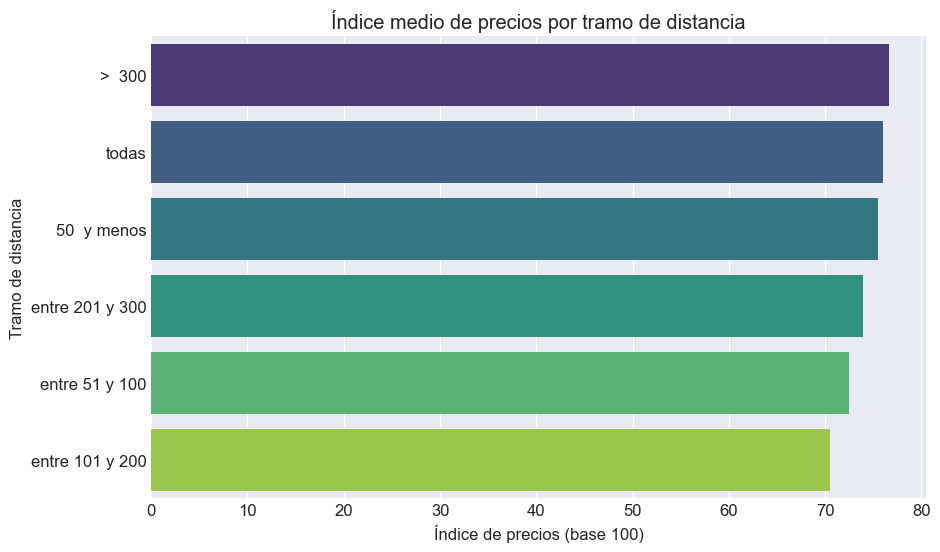

In [19]:
distancia = (
    df.groupby('tramo_distancia', as_index=False)['indice']
    .mean()
    .sort_values('indice', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(data=distancia, y='tramo_distancia', x='indice', palette='viridis')
plt.title('Índice medio de precios por tramo de distancia')
plt.xlabel('Índice de precios (base 100)')
plt.ylabel('Tramo de distancia')
plt.show()

In [20]:
pivot = df.pivot_table(
    index='year',
    columns='tramo_distancia',
    values='indice',
    aggfunc='mean'
).round(1)

pivot

tramo_distancia,50 y menos,> 300,entre 101 y 200,entre 201 y 300,entre 51 y 100,todas
year,,,,,,
2017,65.70,69.10,62.50,67.10,64.40,68.20
2018,66.80,70.90,67.20,70.40,65.40,70.00
2019,70.70,71.60,64.90,68.90,67.90,71.30
2020,72.10,71.80,64.80,69.50,66.40,71.00
2021,69.90,72.50,64.70,68.90,68.50,70.80
2022,84.90,87.70,82.70,85.80,83.20,87.00
2023,89.60,85.20,80.20,81.90,82.40,85.10
2024,84.20,84.40,77.20,79.20,81.20,84.40


In [21]:
ruta_salida = os.path.join(ruta_processed, 'CO497_indice_precios_clean.csv')
df.to_csv(ruta_salida, index=False, encoding='utf-8-sig')

print(f"✅ Dataset limpio guardado en:\n{ruta_salida}")

✅ Dataset limpio guardado en:
../data/processed\CO497_indice_precios_clean.csv


## Explorar el archivo CO614 (Costes por Tipo de Vehículo)

In [22]:
fname = "CO614_Coste_TRM_Carr__tipo_veh.csv"
path = os.path.join(ruta_raw, fname)
df614 = pd.read_csv(path, sep=',', encoding='utf-8', decimal=',')

df614.shape, df614.columns

((4162, 12),
 Index(['vehiculo', 'tipo_coste_anual', 'super_tipo_costes', 'tipo_costes',
        'componente_coste', 'Unidad', 'year', 'valor', 'Textbox35', 'Unidad2',
        'Textbox39', 'Textbox41'],
       dtype='object'))

In [23]:
df614.head(5)


,vehiculo,tipo_coste_anual,super_tipo_costes,tipo_costes,componente_coste,Unidad,year,valor,Textbox35,Unidad2,Textbox39,Textbox41
0,Vehículo articulado de carga general,Costes totales anuales,Costes directos,Costes por tiempo,Amortización del vehículo,EUR,2017.00,"15.616,61",Coste total,EUR,"124.657,96",NaN
1,Vehículo articulado de carga general,Costes totales anuales,Costes directos,Costes por tiempo,Amortización del vehículo,EUR,2018.00,"15.791,76",Coste total,EUR,"129.684,40",NaN
2,Vehículo articulado de carga general,Costes totales anuales,Costes directos,Costes por tiempo,Amortización del vehículo,EUR,2019.00,"15.935,36",Coste total,EUR,"130.371,89",NaN
3,Vehículo articulado de carga general,Costes totales anuales,Costes directos,Costes por tiempo,Amortización del vehículo,EUR,2020.00,"16.073,84",Coste total,EUR,"126.751,42",NaN
4,Vehículo articulado de carga general,Costes totales anuales,Costes directos,Costes por tiempo,Amortización del vehículo,EUR,2021.00,"16.234,00",Coste total,EUR,"133.372,30",NaN


In [24]:
df614.info()
(df614.isna().mean()*100).round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4162 entries, 0 to 4161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehiculo           4162 non-null   object 
 1   tipo_coste_anual   4160 non-null   object 
 2   super_tipo_costes  4160 non-null   object 
 3   tipo_costes        3840 non-null   object 
 4   componente_coste   3840 non-null   object 
 5   Unidad             4160 non-null   object 
 6   year               4160 non-null   float64
 7   valor              4160 non-null   object 
 8   Textbox35          4160 non-null   object 
 9   Unidad2            4160 non-null   object 
 10  Textbox39          4160 non-null   object 
 11  Textbox41          1872 non-null   float64
dtypes: float64(2), object(10)
memory usage: 390.3+ KB


vehiculo             0.00
tipo_coste_anual     0.05
super_tipo_costes    0.05
tipo_costes          7.74
componente_coste     7.74
Unidad               0.05
year                 0.05
valor                0.05
Textbox35            0.05
Unidad2              0.05
Textbox39            0.05
Textbox41           55.02
dtype: float64

In [25]:
df = df614.copy()

# 1) Renombrado explícito (tal cual aparecen en tu CSV)
df = df.rename(columns={
    'vehiculo': 'vehiculo',
    'tipo_coste_anual': 'bloque_coste',         # p.ej. "Costes totales anuales"
    'super_tipo_costes': 'categoria_coste',     # p.ej. "Costes directos"
    'tipo_costes': 'dimension_coste',           # p.ej. "Costes por tiempo"
    'componente_coste': 'partida',              # p.ej. "Amortización del vehículo"
    'Unidad': 'unidad',                         # parece "EUR"
    'year': 'year',
    'valor': 'valor',                           # importe de la partida
})

# 2) Eliminar columnas que no aportan (rótulos/duplicados/NA en tu captura)
cols_drop = [c for c in ['Textbox35','Unidad2','Textbox41','Textbox39'] if c in df.columns]
df = df.drop(columns=cols_drop, errors='ignore')

df.columns

Index(['vehiculo', 'bloque_coste', 'categoria_coste', 'dimension_coste',
       'partida', 'unidad', 'year', 'valor'],
      dtype='object')

In [26]:
for c in ['vehiculo','bloque_coste','categoria_coste','dimension_coste','partida','unidad']:
    df[c] = (df[c].astype(str)
             .str.strip().str.lower()
             .str.replace(r'\s+', ' ', regex=True))

In [27]:
def to_float_es(x):
    x = str(x).strip()
    if x == '' or x.lower() in {'nan','nd','n/d','na','n/a'}:
        return np.nan
    x = (x.replace('€','').replace('EUR','').replace('eur','')
           .replace('−','-').replace('–','-').replace('—','-')
           .replace('.','').replace(',','.')
           .replace(' ',''))
    try:
        return float(x)
    except:
        return np.nan

df['valor_eur'] = df['valor'].apply(to_float_es)
if 'coste_total_texto' in df.columns:
    df['coste_total_eur'] = df['coste_total_texto'].apply(to_float_es)

In [28]:
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype('Int64')


In [29]:
print("Unidad (debería ser casi siempre 'eur'):")
print(df['unidad'].value_counts(dropna=False).head())

print("\nMuestra tras limpieza:")
df.head(5)

Unidad (debería ser casi siempre 'eur'):
unidad
eur                2080
eur/vehículo-km    2080
nan                   2
Name: count, dtype: int64

Muestra tras limpieza:


,vehiculo,bloque_coste,categoria_coste,dimension_coste,partida,unidad,year,valor,valor_eur
0,vehículo articulado de carga general,costes totales anuales,costes directos,costes por tiempo,amortización del vehículo,eur,2017,"15.616,61",15616.61
1,vehículo articulado de carga general,costes totales anuales,costes directos,costes por tiempo,amortización del vehículo,eur,2018,"15.791,76",15791.76
2,vehículo articulado de carga general,costes totales anuales,costes directos,costes por tiempo,amortización del vehículo,eur,2019,"15.935,36",15935.36
3,vehículo articulado de carga general,costes totales anuales,costes directos,costes por tiempo,amortización del vehículo,eur,2020,"16.073,84",16073.84
4,vehículo articulado de carga general,costes totales anuales,costes directos,costes por tiempo,amortización del vehículo,eur,2021,"16.234,00",16234.00


In [30]:
# Suma de partidas por vehículo y año
suma_partidas = (df.groupby(['vehiculo','year'], dropna=False)['valor_eur']
                   .sum().reset_index(name='suma_partidas_eur'))

# Total anual que venía en la tabla (si existe)
if 'coste_total_eur' in df.columns:
    totales = (df.groupby(['vehiculo','year'], dropna=False)['coste_total_eur']
                 .max().reset_index())  # el mismo total se repite por fila; max vale

    comp = suma_partidas.merge(totales, on=['vehiculo','year'], how='left')
    comp['diff_eur'] = comp['suma_partidas_eur'] - comp['coste_total_eur']
    comp['diff_pct'] = comp['diff_eur'] / comp['coste_total_eur']
    print("\nDesviaciones absolutas y relativas (esperable ~0):")
    comp.describe()[['diff_eur','diff_pct']]
else:
    comp = suma_partidas

In [31]:
# Si 'bloque_coste' contiene 'anuales' => eur/año
df['unidad_estandarizada'] = np.where(
    df['bloque_coste'].str.contains('anual', na=False), 'eur/año', df['unidad']
)

cols_final = ['year','vehiculo','bloque_coste','categoria_coste',
              'dimension_coste','partida','unidad_estandarizada','valor_eur']

# Si quieres guardar también el total anual por fila para rastrear:
if 'coste_total_eur' in df.columns:
    cols_final += ['coste_total_eur']

df_final = df[cols_final].sort_values(['vehiculo','year','bloque_coste','categoria_coste','dimension_coste','partida'])
df_final.head(10)

,year,vehiculo,bloque_coste,categoria_coste,dimension_coste,partida,unidad_estandarizada,valor_eur
4161,<NA>,euros corrientes.,nan,nan,nan,nan,nan,NaN
1288,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,combustible,eur/año,4967.69
1296,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,consumo de disolución de urea,eur/año,224.35
1328,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,dietas,eur/año,4930.96
1312,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,mantenimiento,eur/año,422.29
1304,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,neumáticos,eur/año,545.35
1336,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,peajes,eur/año,0.00
1320,2017,furgoneta,costes totales anuales,costes directos,costes kilométricos,reparaciones,eur/año,750.71
1248,2017,furgoneta,costes totales anuales,costes directos,costes por tiempo,amortización del vehículo,eur/año,2122.65
1280,2017,furgoneta,costes totales anuales,costes directos,costes por tiempo,costes fiscales,eur/año,438.46


In [32]:
# Eliminar filas residuales tipo "euros corrientes" o sin año ni valor
df = df[~df['vehiculo'].astype(str).str.contains('euros corrientes', case=False, na=False)]
df = df.dropna(subset=['year', 'valor_eur'], how='any')

# Si por algún motivo la última fila sigue apareciendo (sin year o valor):
df = df[df['year'].notna() & df['valor_eur'].notna()]
df = df.reset_index(drop=True)

print(f"✅ Filas finales tras limpieza: {len(df)}")

✅ Filas finales tras limpieza: 4160


In [33]:
# 🚛 Costes unitarios por vehículo y año (€/km)
coste_unitario = (
    df[df['bloque_coste'].str.contains('unitario', na=False)]
    .groupby(['vehiculo','year'], dropna=False)['valor_eur']
    .mean()  # promedio €/km si hay varios registros
    .reset_index(name='coste_unitario_eur_km')
)

coste_unitario.head()

,vehiculo,year,coste_unitario_eur_km
0,furgoneta,2017,0.07
1,furgoneta,2018,0.07
2,furgoneta,2019,0.08
3,furgoneta,2020,0.08
4,furgoneta,2021,0.08


In [34]:
tot_veh_ano = (df
               .groupby(['vehiculo','year'], dropna=False)['valor_eur']
               .sum()
               .reset_index(name='coste_total_vehiculo_anual_eur'))
tot_veh_ano.head()
tot_veh_ano= tot_veh_ano.merge(coste_unitario, on=['vehiculo','year'], how='outer')
tot_veh_ano.head()

,vehiculo,year,coste_total_vehiculo_anual_eur,coste_unitario_eur_km
0,furgoneta,2017,47322.60,0.07
1,furgoneta,2018,48586.29,0.07
2,furgoneta,2019,49250.84,0.08
3,furgoneta,2020,49150.33,0.08
4,furgoneta,2021,50615.44,0.08


In [35]:
tot_categoria = (df
                 .groupby(['vehiculo','year','categoria_coste'], dropna=False)['valor_eur']
                 .sum()
                 .reset_index(name='coste_total_categoria_eur'))
tot_categoria.head()

,vehiculo,year,categoria_coste,coste_total_categoria_eur
0,furgoneta,2017,costes directos,44434.36
1,furgoneta,2017,costes indirectos,2888.24
2,furgoneta,2018,costes directos,45620.93
3,furgoneta,2018,costes indirectos,2965.36
4,furgoneta,2019,costes directos,46244.92


In [36]:
tot_partida = (df
               .groupby(['vehiculo','year','partida'], dropna=False)['valor_eur']
               .sum()
               .reset_index(name='coste_partida_eur'))

tot_partida.head()

,vehiculo,year,partida,coste_partida_eur
0,furgoneta,2017,amortización del vehículo,2122.69
1,furgoneta,2017,combustible,4967.79
2,furgoneta,2017,consumo de disolución de urea,224.35
3,furgoneta,2017,costes fiscales,438.47
4,furgoneta,2017,dietas,4931.06


In [37]:
estructura = (df
              .groupby(['vehiculo','year','partida'], dropna=False)['valor_eur']
              .sum()
              .reset_index(name='coste_partida_eur'))

tot = (estructura.groupby(['vehiculo','year'], dropna=False)['coste_partida_eur']
       .sum().reset_index(name='coste_total_eur'))

estructura = estructura.merge(tot, on=['vehiculo','year'], how='left')
estructura['pct_partida'] = np.where(estructura['coste_total_eur'] > 0,
                                     estructura['coste_partida_eur']/estructura['coste_total_eur'],
                                     np.nan)
estructura.head()

,vehiculo,year,partida,coste_partida_eur,coste_total_eur,pct_partida
0,furgoneta,2017,amortización del vehículo,2122.69,47322.60,0.04
1,furgoneta,2017,combustible,4967.79,47322.60,0.10
2,furgoneta,2017,consumo de disolución de urea,224.35,47322.60,0.00
3,furgoneta,2017,costes fiscales,438.47,47322.60,0.01
4,furgoneta,2017,dietas,4931.06,47322.60,0.10


In [38]:
df[df['unidad_estandarizada'] == 'eur/vehículo-km']

,vehiculo,bloque_coste,categoria_coste,dimension_coste,partida,unidad,year,valor,valor_eur,unidad_estandarizada
104,vehículo articulado de carga general,costes unitarios,costes directos,costes por tiempo,amortización del vehículo,eur/vehículo-km,2017,"0,1301",0.13,eur/vehículo-km
105,vehículo articulado de carga general,costes unitarios,costes directos,costes por tiempo,amortización del vehículo,eur/vehículo-km,2018,"0,1316",0.13,eur/vehículo-km
106,vehículo articulado de carga general,costes unitarios,costes directos,costes por tiempo,amortización del vehículo,eur/vehículo-km,2019,"0,1328",0.13,eur/vehículo-km
107,vehículo articulado de carga general,costes unitarios,costes directos,costes por tiempo,amortización del vehículo,eur/vehículo-km,2020,"0,1339",0.13,eur/vehículo-km
108,vehículo articulado de carga general,costes unitarios,costes directos,costes por tiempo,amortización del vehículo,eur/vehículo-km,2021,"0,1353",0.14,eur/vehículo-km
...,...,...,...,...,...,...,...,...,...,...
4155,vehículo articulado portacontenedores,costes unitarios,costes indirectos,nan,nan,eur/vehículo-km,2020,"0,0676",0.07,eur/vehículo-km
4156,vehículo articulado portacontenedores,costes unitarios,costes indirectos,nan,nan,eur/vehículo-km,2021,"0,0711",0.07,eur/vehículo-km
4157,vehículo articulado portacontenedores,costes unitarios,costes indirectos,nan,nan,eur/vehículo-km,2022,"0,0829",0.08,eur/vehículo-km
4158,vehículo articulado portacontenedores,costes unitarios,costes indirectos,nan,nan,eur/vehículo-km,2023,"0,0823",0.08,eur/vehículo-km


In [39]:
# ¿Algún año o vehículo con total 0 o NaN?
tot_veh_ano.query('coste_total_vehiculo_anual_eur <= 0 or coste_total_vehiculo_anual_eur != coste_total_vehiculo_anual_eur')

# ¿Partidas con % extraño?
estructura.sort_values('pct_partida', ascending=False).head(10)

# ¿Unidades heterogéneas por accidente?
df['unidad_estandarizada'].value_counts(dropna=False)

unidad_estandarizada
eur/año            2080
eur/vehículo-km    2080
Name: count, dtype: int64

In [40]:
estructura_anual = (
    df[df['unidad_estandarizada'] == 'eur/año']
    .groupby(['vehiculo','year','partida'], dropna=False)['valor_eur']
    .sum().reset_index(name='coste_partida_eur')
)

tot_anual = (
    estructura_anual
    .groupby(['vehiculo','year'], dropna=False)['coste_partida_eur']
    .sum().reset_index(name='coste_total_eur')
)

estructura_anual = estructura_anual.merge(tot_anual, on=['vehiculo','year'], how='left')
estructura_anual['pct_partida'] = np.where(
    estructura_anual['coste_total_eur'] > 0,
    estructura_anual['coste_partida_eur'] / estructura_anual['coste_total_eur'],
    np.nan
)
estructura_anual.head()

,vehiculo,year,partida,coste_partida_eur,coste_total_eur,pct_partida
0,furgoneta,2017,amortización del vehículo,2122.65,47321.65,0.04
1,furgoneta,2017,combustible,4967.69,47321.65,0.10
2,furgoneta,2017,consumo de disolución de urea,224.35,47321.65,0.00
3,furgoneta,2017,costes fiscales,438.46,47321.65,0.01
4,furgoneta,2017,dietas,4930.96,47321.65,0.10


In [41]:
estructura_km = (
    df[df['unidad_estandarizada'] == 'eur/vehículo-km']
    .groupby(['vehiculo','year','partida'], dropna=False)['valor_eur']
    .sum().reset_index(name='coste_partida_eur_km')
)

tot_km = (
    estructura_km
    .groupby(['vehiculo','year'], dropna=False)['coste_partida_eur_km']
    .sum().reset_index(name='coste_total_eur_km')
)

estructura_km = estructura_km.merge(tot_km, on=['vehiculo','year'], how='left')
estructura_km['pct_partida'] = np.where(
    estructura_km['coste_total_eur_km'] > 0,
    estructura_km['coste_partida_eur_km'] / estructura_km['coste_total_eur_km'],
    np.nan
)
estructura_km.head()

,vehiculo,year,partida,coste_partida_eur_km,coste_total_eur_km,pct_partida
0,furgoneta,2017,amortización del vehículo,0.04,0.95,0.04
1,furgoneta,2017,combustible,0.10,0.95,0.11
2,furgoneta,2017,consumo de disolución de urea,0.00,0.95,0.00
3,furgoneta,2017,costes fiscales,0.01,0.95,0.01
4,furgoneta,2017,dietas,0.10,0.95,0.10


In [42]:
# Dataset limpio principal
df.to_csv(os.path.join(ruta_processed, 'CO614_costes_vehiculo_interim.csv'),
          index=False, encoding='utf-8-sig')

# Totales anuales (€/año)
estructura_anual.to_csv(os.path.join(ruta_processed, 'CO614_costes_estructura_anual_clean.csv'),
                        index=False, encoding='utf-8-sig')

# Totales unitarios (€/vehículo-km)
estructura_km.to_csv(os.path.join(ruta_processed, 'CO614_costes_estructura_unitaria_clean.csv'),
                     index=False, encoding='utf-8-sig')

# Totales agregados por vehículo y año
tot_veh_ano.to_csv(os.path.join(ruta_processed, 'CO614_costes_totales_vehiculo_anual_interim.csv'),
                   index=False, encoding='utf-8-sig')

# Coste unitario medio por km
coste_unitario.to_csv(os.path.join(ruta_processed, 'CO614_costes_unitarios_vehiculo_interim.csv'),
                      index=False, encoding='utf-8-sig')

print("✅ Archivos guardados correctamente en la carpeta 'data/processed'")

✅ Archivos guardados correctamente en la carpeta 'data/processed'
